[dataset](https://www.kaggle.com/dushyantv/consumer_complaints)  
前10000条记录

In [1]:
import pandas as pd
df = pd.read_csv('e:/data/Consumer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID,Unnamed: 18
0,03-12-2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217,NaN
1,10-01-2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10-05-2016,Closed with explanation,Yes,No,2141773,NaN
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100,NaN
3,06-08-2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06-10-2014,Closed with explanation,Yes,Yes,885638,NaN
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760,NaN


In [2]:
df.drop(columns=['Unnamed: 18'],inplace=True)
df.isnull().sum()

Date received                        0
Product                              0
Sub-product                     235170
Issue                                0
Sub-issue                       496157
Consumer Complaint              747196
Company Public Response         706646
Company                              0
State                            12360
ZIP code                         16718
Tags                            883422
Consumer consent provided?      533099
Submitted via                        0
Date Sent to Company                 0
Company Response to Consumer         3
Timely response?                     0
Consumer disputed?              256456
Complaint ID                         0
dtype: int64

In [5]:
df = df[pd.notnull(df['Consumer Complaint'])][:10000]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 47000
Data columns (total 18 columns):
Date received                   10000 non-null object
Product                         10000 non-null object
Sub-product                     6845 non-null object
Issue                           10000 non-null object
Sub-issue                       5125 non-null object
Consumer Complaint              10000 non-null object
Company Public Response         4691 non-null object
Company                         10000 non-null object
State                           9973 non-null object
ZIP code                        9973 non-null object
Tags                            1640 non-null object
Consumer consent provided?      10000 non-null object
Submitted via                   10000 non-null object
Date Sent to Company            10000 non-null object
Company Response to Consumer    10000 non-null object
Timely response?                10000 non-null object
Consumer disputed?              9

In [7]:
col = ['Product', 'Consumer Complaint']
df = df[col]
df[:3]

,Product,Consumer Complaint
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...


In [8]:
df.columns

Index(['Product', 'Consumer Complaint'], dtype='object')

In [9]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [10]:
# from io import StringIO
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency'}

In [11]:
df.head()

,Product,Consumer_complaint_narrative,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


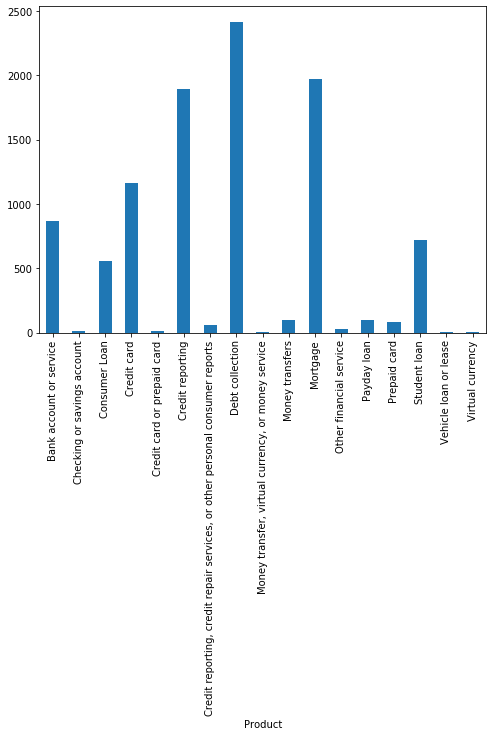

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

tfidf.fit(df.Consumer_complaint_narrative)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='latin-1',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=5, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
tfidf.get_feature_names()[:20]

['00',
 '00 00',
 '00 10',
 '00 100',
 '00 1000',
 '00 1100',
 '00 11000',
 '00 120',
 '00 1400',
 '00 1500',
 '00 1600',
 '00 1800',
 '00 20',
 '00 200',
 '00 2000',
 '00 25',
 '00 30',
 '00 300',
 '00 340',
 '00 37']

In [17]:
features = tfidf.transform(df.Consumer_complaint_narrative)

In [18]:
features_ = features.toarray()
labels = df.category_id
features_.shape

(10000, 26672)

In [19]:
tfidf.transform(['i do not like it']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [31]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features_, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n       . {}".format(
        '\n       . '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n       . {}".format(
        '\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . bank
       . overdraft
  . Most correlated bigrams:
       . overdraft fees
       . checking account
# 'Checking or savings account':
  . Most correlated unigrams:
       . clerical
       . 2018
  . Most correlated bigrams:
       . xx 2018
       . transactions did
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . santander consumer
       . car loan
# 'Credit card':
  . Most correlated unigrams:
       . capital
       . card
  . Most correlated bigrams:
       . annual fee
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . 2018
       . overturned
  . Most correlated bigrams:
       . card supposed
       . reason given
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . verify accounts
       . credit report
# 'Credit reporting, cred

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
len(X_train)
len(X_test)

7500

2500

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
count_vect.get_feature_names()[:10]

['00', '000', '001', '00lender', '00time', '05', '07', '073', '08', '09']

In [43]:
d_ = DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names()).loc[0]
d_[d_!=0]

00            3
100000        1
27            1
27000         1
4900          1
500           1
about         1
account       1
amount        1
and           2
bank          2
be            1
cd            1
credited      1
down          1
equal         1
for           1
from          1
get           2
have          2
if            2
in            3
increase      1
increased     1
index         2
investment    1
linked        1
minimum       1
my            2
of            3
on            1
only          1
per           1
period        1
purchased     1
recieved      1
return        2
should        1
that          2
the           5
to            5
union         2
up            1
was           3
went          2
which         1
xxxx          1
year          3
Name: 0, dtype: int64

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [71]:
d__ = DataFrame(X_train_tfidf.toarray(),columns=count_vect.get_feature_names()).loc[0]
d__[d__!=0].sort_values(ascending=False)

index         0.437381
union         0.256702
year          0.250717
return        0.211909
cd            0.208303
27000         0.195217
4900          0.190546
100000        0.173879
investment    0.169771
00            0.169465
27            0.166232
linked        0.164630
went          0.163658
equal         0.163123
recieved      0.148475
the           0.143112
to            0.140339
500           0.133097
credited      0.129311
minimum       0.129311
increased     0.128923
increase      0.127245
bank          0.126634
get           0.125428
if            0.119792
purchased     0.111359
period        0.110973
was           0.107583
in            0.105621
down          0.100650
of            0.099413
per           0.099221
should        0.071978
amount        0.070460
have          0.069538
that          0.067424
only          0.066112
about         0.064676
up            0.063676
my            0.060014
and           0.057184
which         0.055914
account       0.048091
be         

In [73]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [74]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [75]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting']


In [76]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [77]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(
        model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class i

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.395916
1,RandomForestClassifier,1,0.407888
2,RandomForestClassifier,2,0.396698
3,RandomForestClassifier,3,0.389780
4,RandomForestClassifier,4,0.402708
5,LinearSVC,0,0.832669
6,LinearSVC,1,0.830754
7,LinearSVC,2,0.822411
8,LinearSVC,3,0.832665
9,LinearSVC,4,0.830993


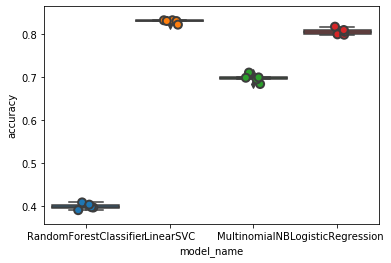

In [85]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [86]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.829899
LogisticRegression        0.806394
MultinomialNB             0.697495
RandomForestClassifier    0.398598
Name: accuracy, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Text(50.99999999999998, 0.5, 'Actual')

Text(0.5, 33.0, 'Predicted')

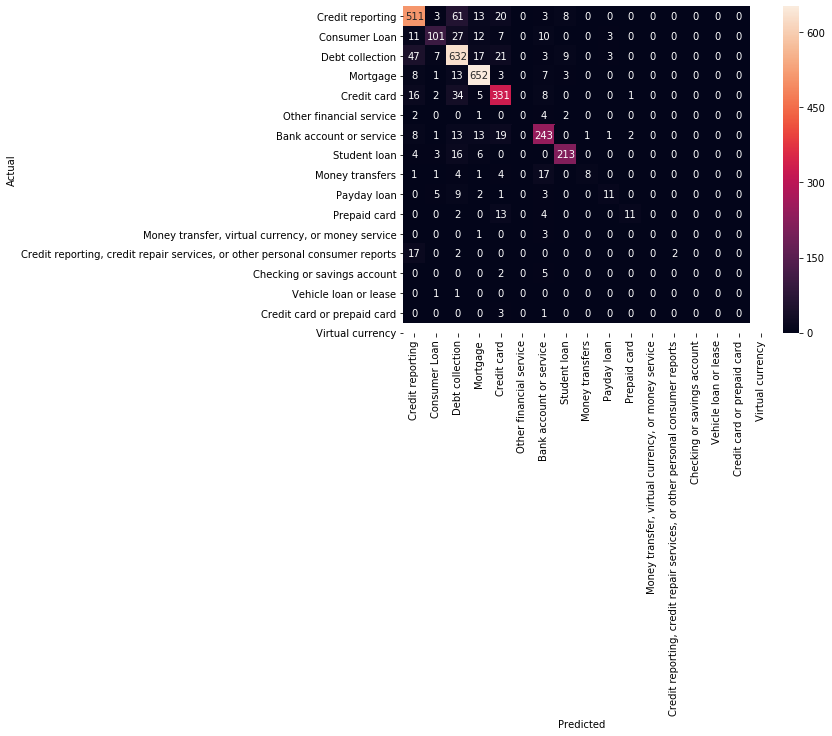

In [88]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [89]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Consumer Loan' predicted as 'Credit reporting' : 11 examples.


,Product,Consumer_complaint_narrative
36938,Consumer Loan,When trying to change the account from which m...
18228,Consumer Loan,In 2005 I got a loan from XXXX XXXX. I paid ev...
8632,Consumer Loan,This is my third follow-up to obtain resolutio...
41454,Consumer Loan,"Equifax continues to list a "" Public Record ''..."
17079,Consumer Loan,Response disputed Experian said : Explanation ...
44196,Consumer Loan,I recently applied for a debt consolidation lo...
36459,Consumer Loan,"XXXX XXXX XXXX, acct XXXX .... I submitted doc..."
28968,Consumer Loan,XXXX continues to report accounts on my credit...
26793,Consumer Loan,THERE ARE UNKNOW INQUIRES ON MY CREDIT REPORT ...
25032,Consumer Loan,I reached out to the creditor and upon speakin...



'Debt collection' predicted as 'Credit reporting' : 47 examples.


,Product,Consumer_complaint_narrative
12213,Debt collection,There keeping call me and my family
6642,Debt collection,In my recent review of my credit report In XX/...
35805,Debt collection,I closed this account in XX/XX/XXXX/XX/XX/2014...
45863,Debt collection,A company I worked for had a business credit c...
14215,Debt collection,Calvery Portfolio purchased account # XXXX fro...
7256,Debt collection,Violation of failing or refusing to validate d...
11870,Debt collection,XXXX XXXX XXXX is reporting negatively on my c...
13785,Debt collection,Please see attached letter from M Leonard And ...
37421,Debt collection,I checked my credit report and saw that there ...
28855,Debt collection,"I hired a reputable company to help "" clean up..."



'Mortgage' predicted as 'Credit reporting' : 8 examples.


,Product,Consumer_complaint_narrative
1057,Mortgage,"On or about XXXX XXXX, 2016, I received a tele..."
864,Mortgage,Mortgage broker did Credit inquiry on my credi...
3595,Mortgage,Real Time Resolution documents have multiple n...
27197,Mortgage,I ordered a payoff on XXXX and the company has...
25017,Mortgage,To : SPS and Equifax XXXX/XXXX/2016 From XXXX ...
40136,Mortgage,We have a couple additional questions for Gold...
33550,Mortgage,I received and attached XXXX separate letters ...
10491,Mortgage,failure to provide a XXXX account statement.



'Credit card' predicted as 'Credit reporting' : 16 examples.


,Product,Consumer_complaint_narrative
22233,Credit card,This account has been paid in full but has not...
26473,Credit card,I paid my XXXX card in full and I was hit with...
31640,Credit card,I have disputed XXXX accounts that SYNBC has b...
14263,Credit card,"Today, I was issued a XXXX that I did not appr..."
5493,Credit card,"I am a victim of identity theft, I have filed ..."
23965,Credit card,The Chase account has been reporting on my per...
39872,Credit card,I have applied for a credit line increase on s...
35735,Credit card,"Macys credit card, XXXX. Fraud alert, approxim..."
14184,Credit card,This account was closed on XXXX/XXXX/09 want t...
32993,Credit card,Received XXXX forms dated XXXX/XXXX/XXXX & XXX...



'Bank account or service' predicted as 'Credit reporting' : 8 examples.


,Product,Consumer_complaint_narrative
16959,Bank account or service,"Hello, I am disputing the charge of {$1000.00}..."
19545,Bank account or service,have fraudulant charges on my card ... .did re...
46061,Bank account or service,I was signed up for email and text alerts for ...
19943,Bank account or service,I have a Health Savings Account with Wells Far...
25804,Bank account or service,I have been trying since XXXX to get XXXX hard...
45901,Bank account or service,I want this company ( Xoom ) to remove all my ...
30118,Bank account or service,I mailed a certified USD XXXX check to BBVS Co...
15738,Bank account or service,"Hello, I need your assistance as these banks a..."



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit reporting' : 17 examples.


,Product,Consumer_complaint_narrative
35400,"Credit reporting, credit repair services, or o...",I mailed in two dispute letters requesting tha...
32235,"Credit reporting, credit repair services, or o...",I have a lot of inquiries I didnt not apply fo...
40114,"Credit reporting, credit repair services, or o...",Second Complaint about lowering my FICO score ...
40925,"Credit reporting, credit repair services, or o...",TRANSUNION HAD A SERVER ERROR SYSTEM GLITCH WH...
32716,"Credit reporting, credit repair services, or o...",Trans Union irresponsibly used their system to...
3853,"Credit reporting, credit repair services, or o...",Around XXXX EST I received a copy of my backgr...
7705,"Credit reporting, credit repair services, or o...",I have disputed the existence of the inaccurat...
41092,"Credit reporting, credit repair services, or o...",Hello : Experian is violating my consumer righ...
31898,"Credit reporting, credit repair services, or o...",Three disputes were submitted to XXXX and bef...
42755,"Credit reporting, credit repair services, or o...","XXXX XXXX XXXX XXXX, a collections attorney, h..."


IndexError: index 16 is out of bounds for axis 0 with size 16

In [90]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [97]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(
        feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(
        feature_names) if len(v.split(' ')) == 2][:N]
    print("# '{}':".format(Product))
    print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
    print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . debit card
       . xxxx police
# 'Checking or savings account':
  . Top unigrams:
       . 2018
       . clerical
  . Top bigrams:
       . transactions did
       . xx 2018
# 'Consumer Loan':
  . Top unigrams:
       . car
       . vehicle
  . Top bigrams:
       . got loan
       . auto loan
# 'Credit card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . credit card
       . minimum payment
# 'Credit card or prepaid card':
  . Top unigrams:
       . overturned
       . 2018
  . Top bigrams:
       . reason given
       . xx 2018
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx account
       . xxxx bank
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . recognize
       . dont
  . Top bigrams:
       . credit inquiries
       . contacted ex

In [98]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Mortgage'

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Money transfer, virtual currency, or money service'



In [119]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=category_id_df[category_id_df.category_id.isin(y_test.unique())]['Product'].values))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.82      0.83      0.82       619
                                                               Consumer Loan       0.81      0.59      0.68       171
                                                             Debt collection       0.78      0.86      0.81       739
                                                                    Mortgage       0.90      0.95      0.92       687
                                                                 Credit card       0.78      0.83      0.81       397
                                                     Other financial service       0.00      0.00      0.00         9
                                                     Bank account or service       0.78      0.81      0.79       301
                                                       

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
